# Lesson 1.7: Data Preprocessing

### Lesson Duration: 3 hours

> Purpose: The purpose of this lesson is to understand the final steps in data preprocessing before fitting the model and testing the accuracy of the model predictions.

---

### Setup

To start this lesson, students should have:

- Completed lesson 1.6
- All previous Setup
- In this lesson we will continue working on the same Jupyter file from the previous lesson

### Learning Objectives

After this lesson, students will be able to:

- Check assumptions in a linear regression model
- Apply data transformations (box-cox and log transformation) on the numerical column
- Process numerical data with scaling

---

### Lesson 1 key concepts

> :clock10: 20 min

- Review multivariate linear regression model and its assumptions on independent variables
- Using EDA to check the assumptions in a linear regression model

  - Checking normality assumption (for the residuals)
  - Check skewness in the data

- Managing skewness in the data

:exclamation: Note In this lesson, we will continue working with the same Jupyter file from the previous lesson. If the students do not have the file, use the following code for quick set up.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('./files_for_lesson_and_activities/regression_data1.csv')

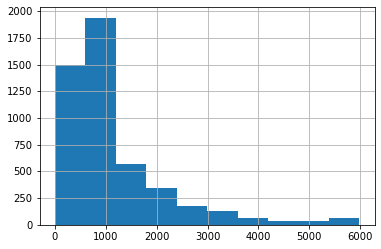

In [4]:
data['HV1'].hist()
plt.show()

C:\Users\GW528AU\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


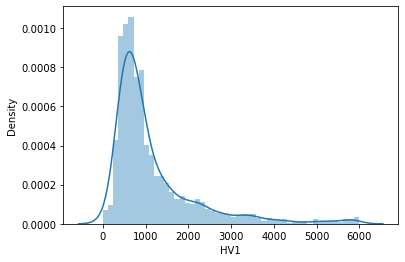

In [5]:
sns.distplot(data['HV1'])
plt.show()

C:\Users\GW528AU\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


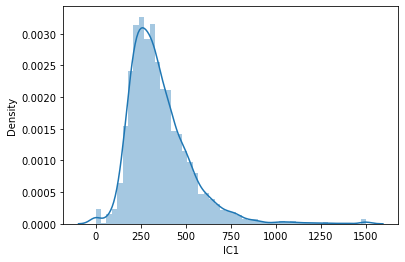

In [6]:
sns.distplot(data['IC1'])
plt.show()

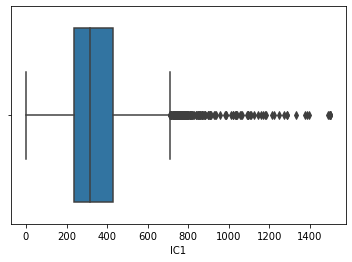

In [7]:
sns.boxplot(x=data['IC1'])
plt.show()

In [8]:
iqr = np.percentile(data['IC1'],75) - np.percentile(data['IC1'],25)

In [9]:
upper_limit = np.percentile(data['IC1'],75) + 1.5*iqr

In [10]:
lower_limit = np.percentile(data['IC1'],25) - 1.5*iqr

In [11]:
data = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]

C:\Users\GW528AU\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


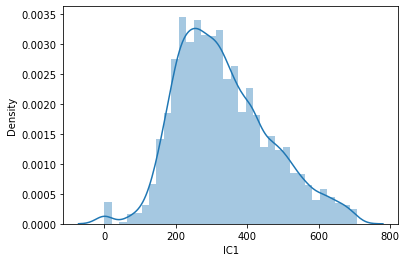

In [12]:
sns.distplot(data['IC1'])
plt.show()

</details>

#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

# 1.07 Activity 1

Refer to the `files_for_activities/regression_data1.csv` file. (_The same file used in the class example._)

1. Draw a box plot for the IC2.
2. Print the descriptive statistics for IC2.
3. Remove the outliers from the column IC2.

In [3]:
data_activity = pd.read_csv('./files_for_lesson_and_activities/regression_data1.csv')
data_activity = data.copy()

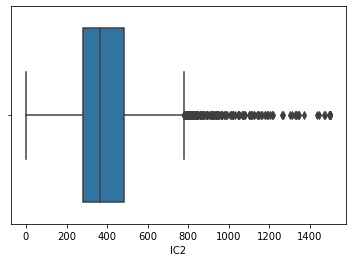

In [13]:
# 1
sns.boxplot(x=data_activity['IC2'])
plt.show()

In [14]:
# 2
data_activity['IC2'].describe()

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64

C:\Users\GW528AU\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


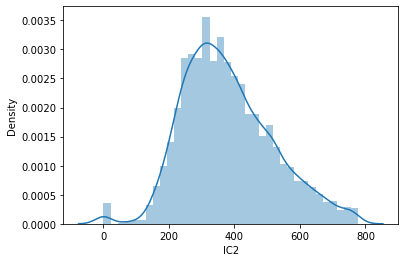

In [15]:
# 3
iqr = np.percentile(data_activity['IC2'],75) - np.percentile(data_activity['IC2'],25)
upper_limit = np.percentile(data_activity['IC2'],75) + 1.5*iqr
lower_limit = np.percentile(data_activity['IC2'],25) - 1.5*iqr
data_activity = data_activity[(data_activity['IC2'] > lower_limit) & (data_activity['IC2'] < upper_limit)]
sns.distplot(data_activity['IC2'])
plt.show()

### Lesson 2 key concepts

> :clock10: 20 min

- Data transformations:
  - Log transformations: to change the scale of a feature ranging from e.g., 0-1000000 (10**6) to 0-6

<details>
<summary> Click for Code Sample </summary>

> Log transformation

- Since some values might become -inf when we take the logarithm of values in the column that are 0, we will have to filter those values. Remember we might not able to use this method if there are too many such values and if they are important.

In [ ]:
# Code to test how the transformation will look like.
# Here we are trying two different codes. Notice that in the first function
# we are replacing the -inf values after we take logarithm by 0 while in
# the second case we will replace them with np.NaN. The idea is that
# we will then replace those NaN values in the column with the mean or
# median of the column

def log_transfom_clean1(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

In [ ]:
HV1_log = list(map(log_transfom_clean1, data['HV1']))

In [ ]:
sns.distplot(HV1_log)
plt.show()

In [ ]:
def log_transfom_clean2(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later

In [ ]:
data['HV1_log'] = list(map(log_transfom_clean2, data['HV1']))

In [ ]:
# Now we replace the NA by the mean
data['HV1_log'] = data['HV1_log'].fillna(np.mean(data['HV1_log']))

In [ ]:
sns.distplot(data['HV1_log'])
plt.show()

In [ ]:
data = data.drop(['HV1'], axis=1)
data.head()

</details>

#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

<details>
  <summary> Click for Instructions: Activity 2 </summary>

# 1.07 Activity 2

Keep using the same file.

1. Repeat the process(log transformation) for the column IC3. Define the function again yourself.
2. Remove the tails of the transformed column to make it closer to the normal distribution. This time change the factor from 1.5 to 3 when calculating the upper limit and the lower limit. Check the distribution plot. Does it remove the tails effectively? If not change the factor back to 1.5 and see the results.

In [ ]:
data_activity = pd.read_csv('./files_for_lesson_and_activities/regression_data1.csv')
data_activity = data.copy()

In [ ]:
# 1

def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later

In [ ]:
data_activity['IC3_log'] = list(map(log_transfom_clean_, data_activity['IC3']))
data_activity['IC3_log'] = data_activity['IC3_log'].fillna(np.mean(data_activity['IC3_log']))
sns.distplot(data_activity['IC3_log'])
plt.show()

In [ ]:
np.percentile(data_activity['IC3_log'], 75)

In [ ]:
# 2

iqr = np.percentile(data_activity['IC3_log'],75) - np.percentile(data_activity['IC3_log'],25)
upper_limit = np.percentile(data_activity['IC3_log'], 75) + 1.5*iqr
lower_limit = np.percentile(data_activity['IC3_log'], 25) - 1.5*iqr
data = data_activity[(data_activity['IC3_log'] > lower_limit) & (data_activity['IC3_log'] < upper_limit)]
sns.distplot(data_activity['IC3_log'])
plt.show()

### Lesson 3 key concepts

> :clock10: 20 min

- Data transformations continued
  - Box-cox/power transformations - make the feature closer to a normal distribution. Note that this is not a strict requirement for Linear Regression. Not the data but the residuals need to be normally distributed. Still there are many methods that work better if the data is normally distributed (e.g., hypothesis testing)

<details>
<summary> Click for Code Sample </summary>

- Box-cox transformation

The data should be strictly positive to be able to use it in SciPy. We will use it on 'IC1'.

In [ ]:
# Since this is median household income, we can filter out negative values:
# len(data[data['IC1']<=0])  # number of such observations.

In [ ]:
# if you do not want to lose this data, replace it with the mean of the column
data['IC1_'] = np.where(data['IC1']<=0,0,data['IC1'])

In [ ]:
# now calculate mean of the new column , excluding zeros in the count
mean = np.sum(data['IC1_']) / len(data[data['IC1_'] > 0])

In [ ]:
data['IC1_'] = data['IC1_'].replace(0, mean)

In [ ]:
data = data.drop(['IC1'], axis=1)

In [ ]:
from scipy import stats
xt, lmbda = stats.boxcox(data['IC1_'])

In [ ]:
sns.distplot(xt)
plt.show()

</details>

---

#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

# 1.07 Activity 3

Repeat the same steps for column `IC5` for box-cox transformation.

In [ ]:
data_activity = pd.read_csv('./files_for_lesson_and_activities/regression_data1.csv')
data_activity = data.copy()

In [ ]:
# Repeat the same steps for column 'IC5'
# for box cox transformation, we can also use sklearn's preprocessing module. It will be introduced later

data_activity['IC5_'] = np.where(data_activity['IC5'] <= 0, 0, data_activity['IC5'])

In [ ]:
mean = np.sum(data_activity['IC5_'])/len(data_activity[data_activity['IC5_'] > 0])

In [ ]:
data_activity['IC5_'] = data_activity['IC5_'].replace(0, mean)

In [ ]:
data_activity = data_activity.drop(['IC5'], axis=1)

In [ ]:
xt2, lmbda2 = stats.boxcox(data_activity['IC5_'])

In [ ]:
data_activity['IC1_transformed'] = xt
data_activity['IC5_transformed'] = xt2

In [ ]:
data_activity = data_activity.drop(['IC1_', 'IC5_'], axis=1)

In [ ]:
Y = data_activity['TARGET_D']
X = data_activity.drop(['TARGET_D'], axis=1)

### Lesson 4 key concepts

> :clock10: 20 min

- Why do we need data preprocessing
  - make the scales for features similar because methods depend on distances
  - make the feature less skewed
- Preprocessing data using the `sklearn`: scaling features
  - Standardization using MinMaxScaler
  - Normalizing using StandardScaler
- these are the most common examples of transformations, there are more and we need to choose which ones to apply

<details>
<summary> Click for Code Sample </summary>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('./files_for_lesson_and_activities/regression_data1.csv') # this file is inside files_for_lesson_and_activities folder

In [ ]:
Y = data['TARGET_D']

In [ ]:
data = data.drop(['TARGET_D'], axis=1)

In [ ]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [ ]:
# scaling data
transformer = MinMaxScaler().fit(X_num)

In [ ]:
x_normalized = transformer.transform(X_num)

In [ ]:
print(x_normalized.shape)
# pd.DataFrame(x_normalized)

In [ ]:
# normalizing using standard scaler
transformer = StandardScaler().fit(X_num)

In [ ]:
x_standardized = transformer.transform(X_num)

In [ ]:
print(x_standardized.shape)
# pd.DataFrame(x_standardized)

#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

# 1.07 Activity 4

Keep using the same file (`files_for_activities/regression_data1.csv`) for this exercise.

1. Load data `regression_data1.csv`.
2. Select 3 numeric columns.
3. Plot distributions.
4. Normalize.
5. Plot new distributions.

In [ ]:
# 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df=pd.read_csv('./files_for_lesson_and_activities/regression_data1.csv') # this file is inside files_for_lesson_and_activities folder

df.head()

In [ ]:
# 2
data2=df._get_numeric_data().iloc[:, 0:3].dropna()

In [ ]:
# 3
# same for the three columns

for i in range(3):
    sns.distplot(data2.iloc[:,i])
    plt.show()

In [ ]:
# 4
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(data2)

In [ ]:
x_standardized = transformer.transform(data2)

In [ ]:
data3 = pd.DataFrame(x_standardized)

In [ ]:
data3.head()

In [ ]:
# 5
sns.distplot(data3.iloc[:,2])

### :pencil2: Practice on key concepts - Lab

> :clock10: 30 min

<details>
  <summary> Click for Instructions: Lab </summary>

# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).

### Additional Resources

- [Dummy Variable Trap](https://www.jigsawacademy.com/understanding-dummy-variable-traps-regression/)
- [Linear regression accuracies](https://www.dataquest.io/blog/understanding-regression-error-metrics/)
- [Model accuracies](https://scikit-learn.org/stable/modules/model_evaluation.html)
- [Choosing transformations](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)